### Continuous Variable Probabilistic Methods for Identifying Outliers. Exercises

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Define a function named `get_lower_and_upper_bounds` that has two arguments. The first argument is a pandas `Series`. The second argument is the `multiplier`, which should have a default argument of `1.5`.

In [8]:
def get_lower_and_upper_bounds(s: pd.Series, multiplier : float = 1.5):
    '''
    Calculates lower and upper bounds of the data to find outliers
    
    Parameters:
        s: pandas Series (column of a DataFrame)
        multiplier: float, how far from q1 and q3 the outliers begin. Default: 1.5
    Returns:
        lower and upper bounds
    '''
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    # calculate the interquartile range
    iqr = q3 - q1
    lower_bound = q1 - (iqr * multiplier)
    upper_bound = q3 + (iqr * multiplier)
    return lower_bound, upper_bound

#### Using `lemonade.csv` dataset and focusing on continuous variables:

In [98]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

In [99]:
df.head(1)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.0,15,0.5,10


In [100]:
df.Date = pd.to_datetime(df.Date)

In [101]:
df.set_index('Date', inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


In [103]:
df.describe()[1:].T

,mean,std,min,25%,50%,75%,max
Temperature,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [104]:
df.Price.unique()

array([0.5])

In [105]:
try: 
    del df['Price']
except KeyError:
    print('This column is not available')

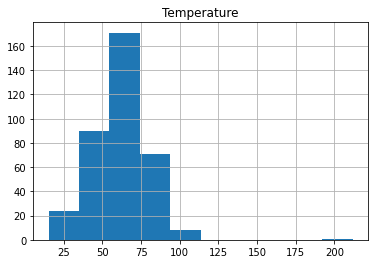

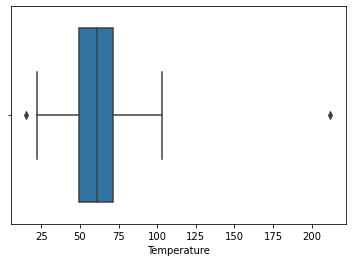

--------


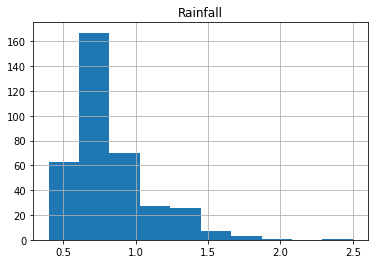

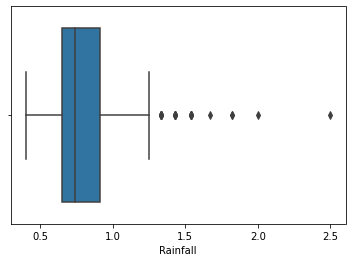

--------


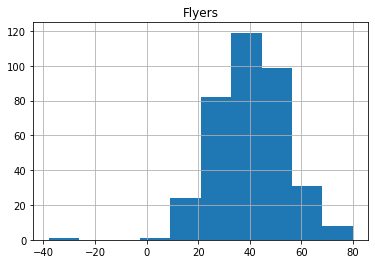

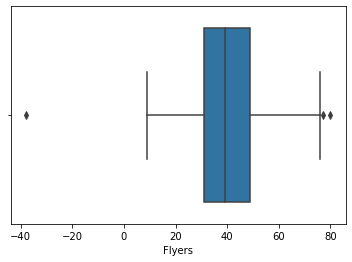

--------


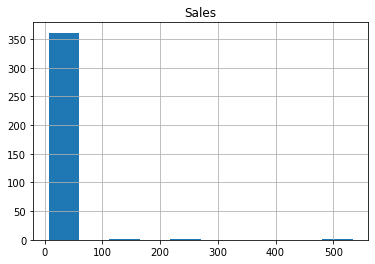

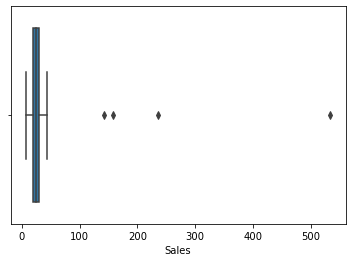

--------


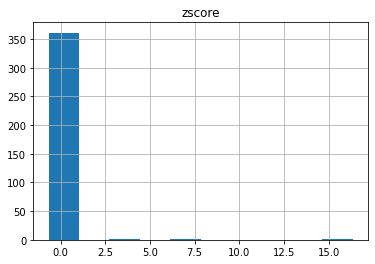

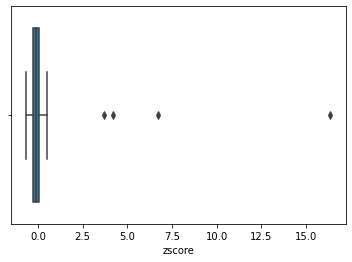

--------


In [89]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
        print('--------')

In [121]:
df[df.temperature > 100]

,month,day,temperature,rainfall,flyers,sales
Date,,,,,,
2017-06-26,June,Monday,102.6,0.47,60,42
2017-07-01,July,Saturday,102.9,0.47,59,143


In [106]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df.loc[df.Temperature == 212, "Temperature"] = df.loc["10/2/17"].Temperature

In [107]:
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
2017-06-26,Monday,102.6,0.47,60,42
2017-07-01,Saturday,102.9,0.47,59,143


In [108]:
 df.insert(0,'month', df.index.month_name())

In [112]:
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [114]:
df.columns = df.columns.str.lower()

In [115]:
df.head(1)

,month,day,temperature,rainfall,flyers,sales
Date,,,,,,
2017-01-01,January,Sunday,27.0,2.0,15,10


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these __lower__ outliers make sense? Which outliers should be kept?

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these __upper__ outliers make sense? Which outliers should be kept?

In [119]:
num_columns = df.loc[:, 'temperature':].columns.to_list()

for col in num_columns:
    lower, upper = get_lower_and_upper_bounds(df[col])
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower,2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {round(upper, 2)}')
    print()

temperature:
Minmum: 15.1, Lower bound: 17.3
Maximun: 102.9, Upper bound: 103.7

rainfall:
Minmum: 0.4, Lower bound: 0.26
Maximun: 2.5, Upper bound: 1.3

flyers:
Minmum: -38, Lower bound: 4.0
Maximun: 80, Upper bound: 76.0

sales:
Minmum: 7, Lower bound: 5.0
Maximun: 534, Upper bound: 45.0



- Temperature: changed 212 degrees
- Rainfall: keep everything
- Flyers: don't keep < lower bound
- Sales: ?

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the __lower__ bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the __upper__ bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [50]:
for col in num_columns:
    lower, upper = get_lower_and_upper_bounds(df[col], multiplier=3)
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower, 2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {upper}')
    print()


Temperature:
Minmum: 15.1, Lower bound: -16.3
Maximun: 212.0, Upper bound: 137.7

Rainfall:
Minmum: 0.4, Lower bound: -0.13
Maximun: 2.5, Upper bound: 1.69

Flyers:
Minmum: -38, Lower bound: -23.0
Maximun: 80, Upper bound: 103.0

Sales:
Minmum: 7, Lower bound: -10.0
Maximun: 534, Upper bound: 60.0



- Temperature: the top outlier doesn't make sense. It's way above normal. Lower outlier is below minimum
- Rainfall: keep everything
- Flyers: lower bound is negative, doesn't make sense 
- Sales: upper bound makes more sense than with multiplier 1.5

2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?

In [56]:
df.index

RangeIndex(start=0, stop=365, step=1)

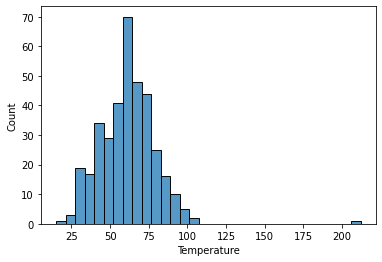

Temperature:
Minmum: 15.1, Lower bound: 25.05
Maximun: 212.0, Upper bound: 97.39644213085184


,Temperature
181,102.9
182,93.4
183,81.5
184,84.2


True



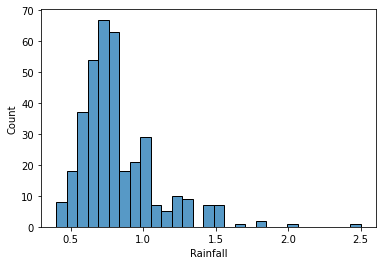

Rainfall:
Minmum: 0.4, Lower bound: 0.28
Maximun: 2.5, Upper bound: 1.3737531367794353


,Rainfall
181,0.47
182,0.51
183,0.54
184,0.59


True



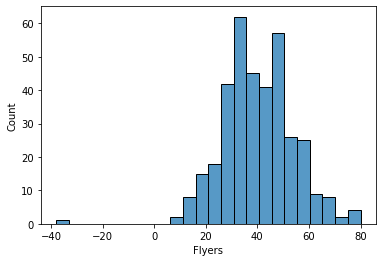

Flyers:
Minmum: -38, Lower bound: 12.53
Maximun: 80, Upper bound: 67.67699877341579


,Flyers
181,59
182,68
183,68
184,49


True



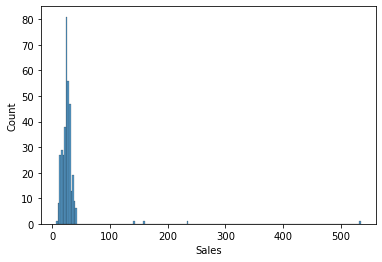

Sales:
Minmum: 7, Lower bound: -34.03
Maximun: 534, Upper bound: 89.76201739593682


,Sales
181,143
182,158
183,235
184,534


True



In [83]:
for col in num_columns:
    df['zscore'] = (df[col] - df[col].mean()) / df[col].std()
    lower = df[col].mean() - 2 * df[col].std()
    upper = df[col].mean() + 2 * df[col].std()
    sns.histplot(data=df, x=col)
    plt.show()
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower, 2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {upper}')
    display(pd.DataFrame(df[df.zscore.abs() >= 2][col]))
    #display(df[(df[col] < lower)|(df[col]>upper)][col])
    print(df[df['zscore'].abs() >= 2][col].equals(df[(df[col] < lower)|(df[col]>upper)][col]))
    print()

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [ ]:
for i, col in zip(df.index, num_columns):
    df['zscore'] = (df[col] - df[col].mean()) / df[col].std()
    lower = df[col].mean() - 2 * df[col].std()
    upper = df[col].mean() + 2 * df[col].std()
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower, 2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {upper}')
    display(pd.DataFrame(df[df.zscore >=2][col]))
    print()